In [733]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [734]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [735]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [736]:
train = train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)

In [737]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [738]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [739]:
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)

In [740]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [741]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [742]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [743]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [744]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [745]:
from matplotlib import pyplot as plt

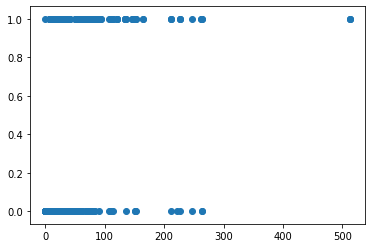

In [746]:
plt.scatter(train['Fare'], train['Survived'])

In [747]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,27.915709,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [748]:
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)

In [749]:
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)

In [750]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,27.915709,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [751]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
ml = LogisticRegression(solver='lbfgs')

In [752]:
x = train.drop(['Survived', 'Age', 'Parch', 'Fare', 'SibSp'], axis=1)
y = train['Survived']
ml.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [753]:
x

,Pclass,Sex
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,1
889,1,0


In [754]:
ml.coef_

array([[-0.9409673 ,  2.50351009]])

In [755]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

scoring = 'accuracy'
score = cross_val_score(ml, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75862069 0.74712644 0.74712644 0.77011494 0.81395349 0.74418605
 0.80232558 0.77906977 0.8255814  0.84883721]


78.37

In [756]:
lf = RandomForestClassifier()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75862069 0.74712644 0.74712644 0.71264368 0.81395349 0.74418605
 0.75581395 0.77906977 0.74418605 0.77906977]


/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


75.82

In [757]:
lf = KNeighborsClassifier()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.77011494 0.74712644 0.74712644 0.71264368 0.81395349 0.74418605
 0.75581395 0.79069767 0.74418605 0.77906977]


76.05

In [758]:
lf = DecisionTreeClassifier()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75862069 0.74712644 0.74712644 0.71264368 0.81395349 0.74418605
 0.75581395 0.77906977 0.74418605 0.77906977]


75.82

In [759]:
lf = GaussianNB()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75862069 0.74712644 0.74712644 0.77011494 0.81395349 0.74418605
 0.80232558 0.77906977 0.8255814  0.74418605]


77.32

In [763]:
lf = SVC()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75862069 0.74712644 0.74712644 0.71264368 0.81395349 0.74418605
 0.75581395 0.77906977 0.74418605 0.77906977]


/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anacon

75.82

In [762]:
predict = ml.predict(test.drop(['PassengerId', 'Age', 'Parch', 'Fare', 'SibSp'], axis=1))
result =pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predict
})
result.to_csv('result.csv', index=False)  